In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/data/train_essays.csv")

In [3]:
train.head(10)

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
5,Cell phone use should not be legal while drivi...,0,Phones and driving,persuade_corpus,False
6,Phones and Driving\n\nDriving is a good way to...,0,Phones and driving,persuade_corpus,False
7,PHONES AND DRIVING\n\nIn this world in which w...,0,Phones and driving,persuade_corpus,False
8,People are debating whether if drivers should ...,0,Phones and driving,persuade_corpus,False
9,Texting and driving\n\nOver half of drivers in...,0,Phones and driving,persuade_corpus,False


In [4]:
missing_values_count = train['text'].isna().sum()
print(missing_values_count)

0


In [5]:
duplicates_count = train.duplicated(subset='text').sum()
print(duplicates_count)

0


In [6]:
def label_charts(df):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4)) 

    # Plotting the pie chart
    df["label"].replace({0: "Human", 1: "AI"}).value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')  

    # Plotting the bar chart
    sns.countplot(x=df["label"].replace({0: "Human", 1: "AI"}), ax=ax[1])

    plt.tight_layout()
    plt.show()

In [7]:
def prompt_charts(df):
    f, ax = plt.subplots(2, 1, figsize=(8, 12))

    # Plotting the pie chart
    explode_values = [0]*len(df['prompt_name'].unique())
    df["prompt_name"].value_counts().plot.pie(explode=explode_values, autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_ylabel('')  

    # Plotting the bar chart
    sns.countplot(x=df["prompt_name"], ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')

    # Rotate x-axis labels
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

In [8]:
def prompt_label_plot(df):
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x="prompt_name", y="label")
    plt.xticks(rotation=90)  
    plt.show()

In [9]:
def prompt_label_table(df):
    return df[["prompt_name", "label"]].groupby(["prompt_name"], as_index=False).mean().sort_values(by='label', ascending=False).style.background_gradient(low=0.75,high=1)

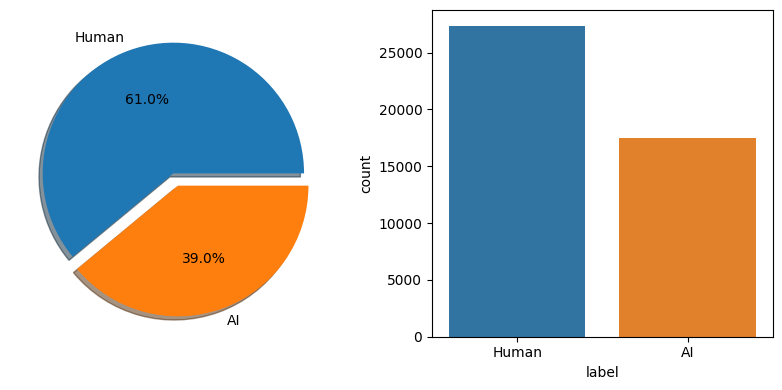

In [10]:
label_charts(train)

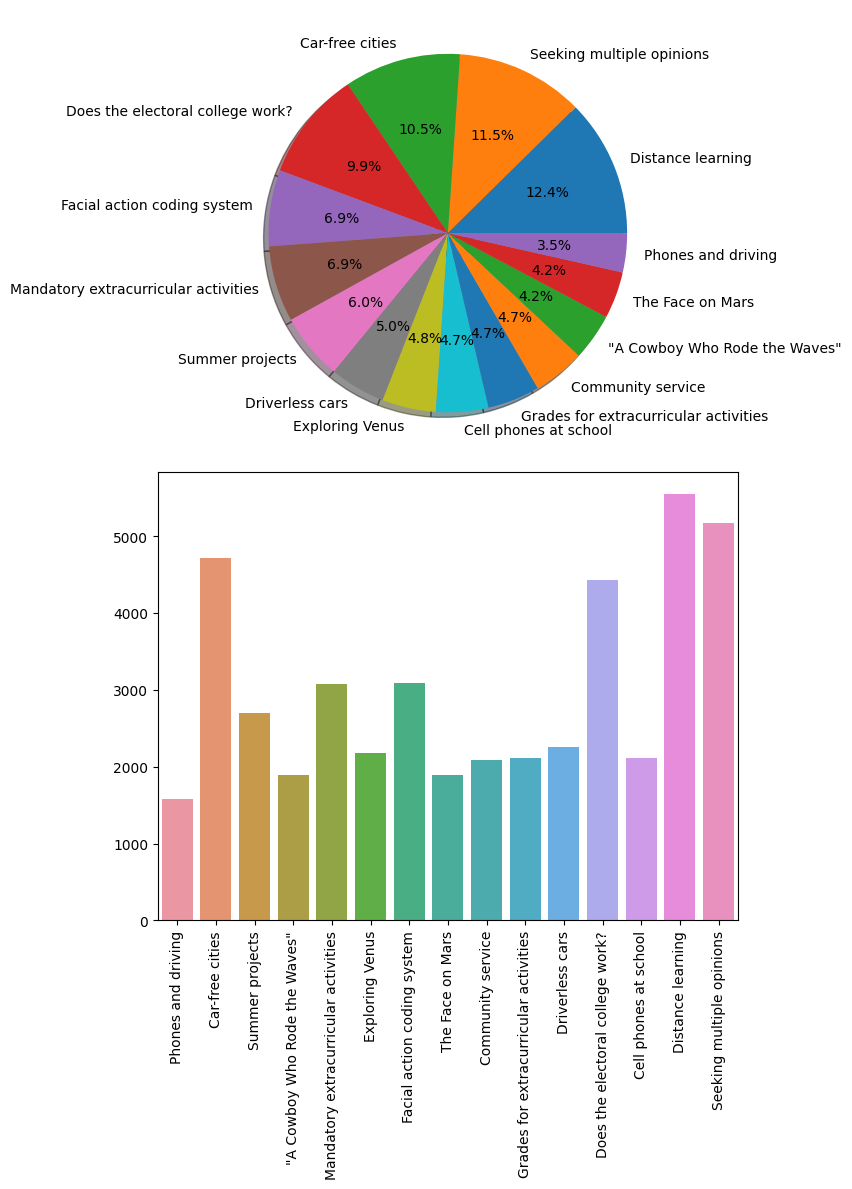

In [11]:
prompt_charts(train)

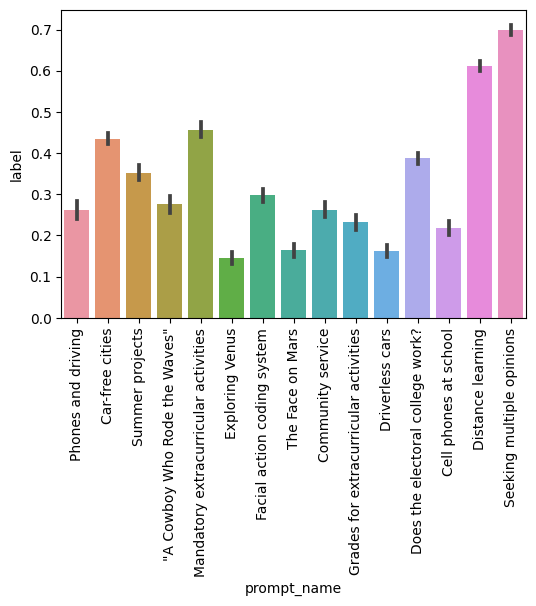

In [12]:
prompt_label_plot(train)

In [13]:
prompt_label_table(train)

,prompt_name,label
12,Seeking multiple opinions,0.700155
4,Distance learning,0.611631
10,Mandatory extracurricular activities,0.457264
1,Car-free cities,0.434810
5,Does the electoral college work?,0.387912
13,Summer projects,0.352092
8,Facial action coding system,0.297341
0,"""A Cowboy Who Rode the Waves""",0.276371
3,Community service,0.262906
11,Phones and driving,0.262160


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


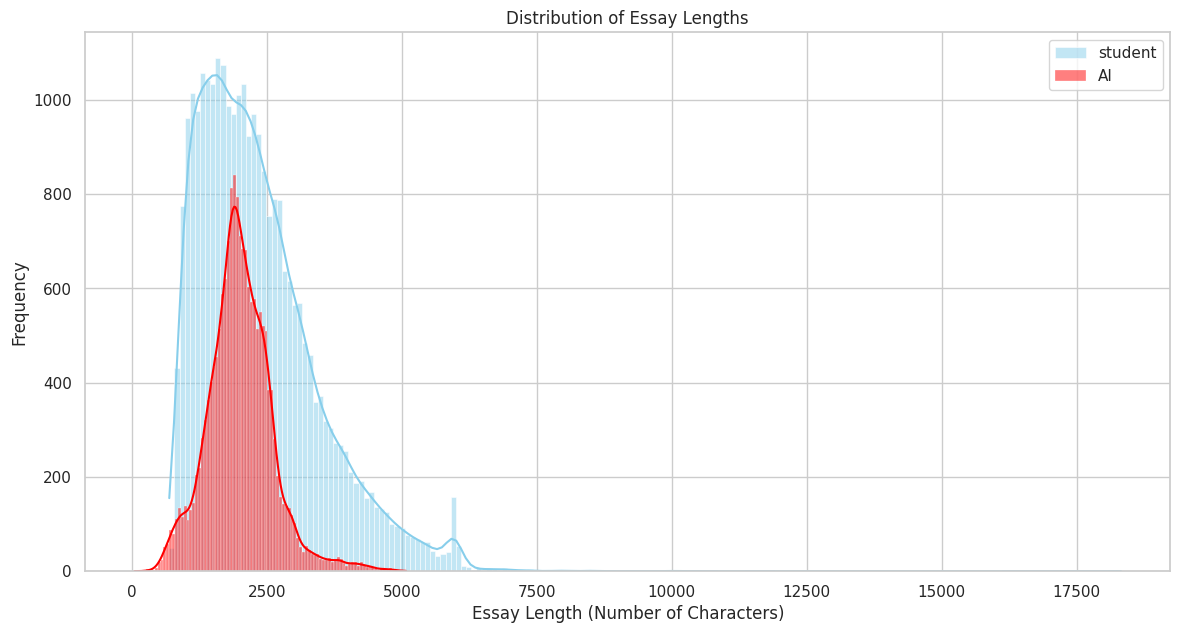

In [18]:
train['essay_length'] = train['text'].apply(len)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.histplot(train[train['label'] == 0]['essay_length'], color="skyblue", label='student', kde=True)

sns.histplot(train[train['label'] == 1]['essay_length'], color="red", label='AI', kde=True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


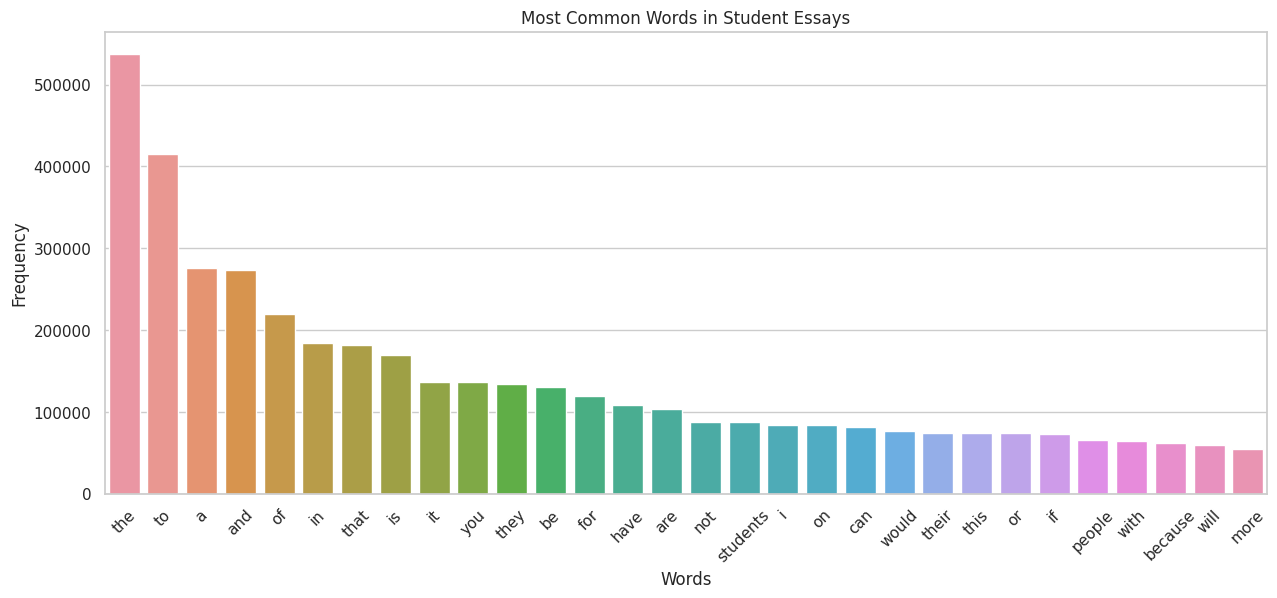

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


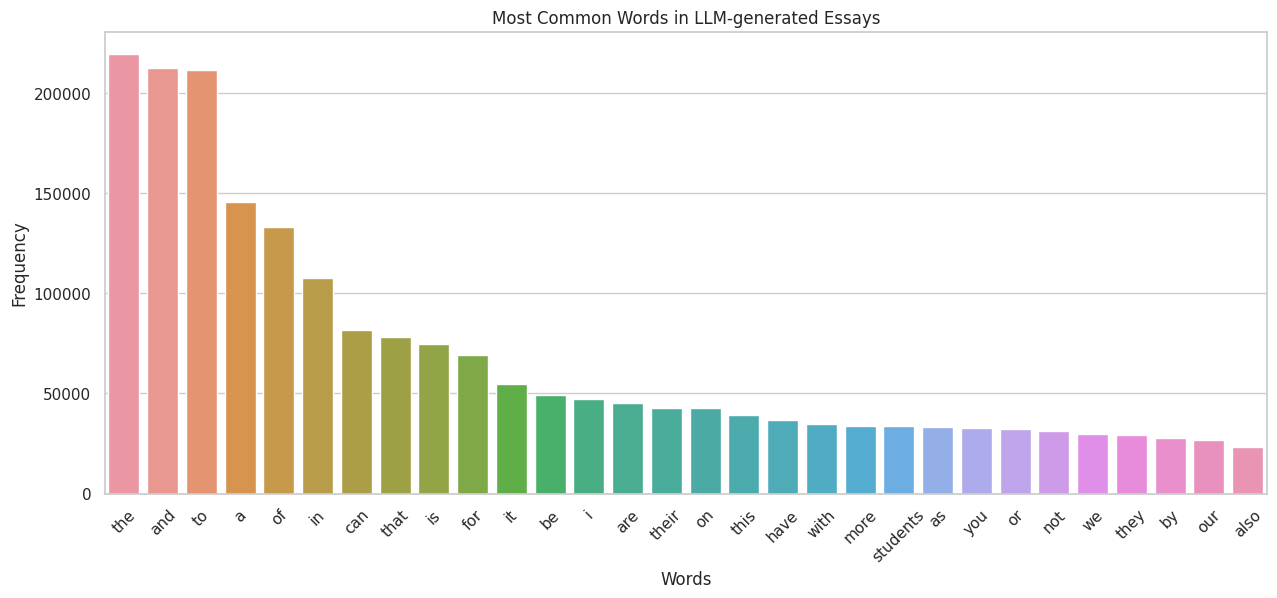

In [19]:
from collections import Counter
import itertools

def plot_most_common_words(text_series, num_words=30, title="Most Common Words"):
    all_text = ' '.join(text_series).lower()
    words = all_text.split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(num_words)
    
    # Plot the most common words
    plt.figure(figsize=(15, 6))
    sns.barplot(x=[word for word, freq in common_words], y=[freq for word, freq in common_words])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

plot_most_common_words(train[train['label'] == 0]['text'], title="Most Common Words in Student Essays")
plot_most_common_words(train[train['label'] == 1]['text'], title="Most Common Words in LLM-generated Essays")